In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [753]:
%matplotlib inline

In [754]:
# reading data_v0.1_sales.csv
data=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/clean/data_v0.1_sales.csv')

# Preprocessing

In [755]:
# filter small products
daten=data[(data.cluster=='small')]

In [756]:
#seperate data in (october - december) and january
data_target=daten.iloc[:,93:124]

In [757]:
data_train=daten.iloc[:,0:93]

In [758]:
data_train

,key,2017-10-01_sales,2017-10-02_sales,2017-10-03_sales,2017-10-04_sales,2017-10-05_sales,2017-10-06_sales,2017-10-07_sales,2017-10-08_sales,2017-10-09_sales,...,2017-12-22_sales,2017-12-23_sales,2017-12-24_sales,2017-12-25_sales,2017-12-26_sales,2017-12-27_sales,2017-12-28_sales,2017-12-29_sales,2017-12-30_sales,2017-12-31_sales
0,10000XL ( 158-170 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10001L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100034 ( 39-42 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100035 ( 43-46 ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,10006XL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,10008XL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,10013L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10013M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10013S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10015L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [759]:
#compute avg sales per product
data_train['avg']=data_train.mean(axis=1)

In [760]:
#red test data
test0=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/test/test_0.csv')
test1=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/test/test_1.csv')
test2=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/test/test_2.csv')
test3=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/test/test_3.csv')
test4=pd.read_csv('/Users/basilsattler/Desktop/datamining2-develop/data/test/test_4.csv')

In [761]:
#change type from float to int as preparation for key generation
test0['pid']=test0['pid'].astype(int)
test1['pid']=test1['pid'].astype(int)
test2['pid']=test2['pid'].astype(int)
test3['pid']=test3['pid'].astype(int)
test4['pid']=test4['pid'].astype(int)

In [762]:
#create key function
def keycr(train):
    keys3=[]
    i=0
    while i<len(train):
        key=str(train.iloc[i,1])+str(train.iloc[i,2])
        keys3.append(key)
        i=i+1
    return keys3

In [763]:
#creating the keys for test data
test0['key']=keycr(test0)
test1['key']=keycr(test1)
test2['key']=keycr(test2)
test3['key']=keycr(test3)
test4['key']=keycr(test4)

In [764]:
data_train = data_train.reset_index(drop=True)

In [765]:
# function creates new test data set which includes only the small product
def seperate_test(test):
    i=0 
    arr=[]
    c=0
    test = test.reset_index(drop=True)
    while i<len(data_train):
        if data_train['key'][i] in test['key'].values:
            arr.append(data_train['key'][i])
            c=c+1
        i=i+1
    print('NUMBER OF KEYS OF SMALL PRODUCTS IN TEST')
    print(c)
    i=0 
    test00=test
    while i<len(test):
        if test['key'][i] not in arr:
            test00=test00[test00.key != test['key'][i]]
        i=i+1
    return test00

In [766]:
#applying the function
test0=seperate_test(test0)
test1=seperate_test(test1)
test2=seperate_test(test2)
test3=seperate_test(test3)
test4=seperate_test(test4)

NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505
NUMBER OF KEYS OF SMALL PRODUCTS IN TEST
5505


In [767]:
#objective functions from chung
def abs_sales_diff(pred, target):
    assert len(pred) == len(target)
    return sum([abs(pred[i] - target[i]) for i in range(len(pred))])

In [768]:
#function which computes objective function for given data for dates between 1 and 31
def baseline(test):
    j=1
    results=[]
    while j<32:
        pred=[]
        for i in range(len(test)):
            pred.append(j)
        i=0
        test.index=range(len(test))
        targets=[]
        while i<len(test):
            targets.append(int(test['sold_out_date'][i][8:10]))
            i=i+1
        results.append(np.sqrt(abs_sales_diff(pred,targets)))
        j=j+1
    return results
            

In [769]:
#figuring out the optimal baseline for the 5 testsets
results0=baseline(test0)
results1=baseline(test1)
results2=baseline(test2)
results3=baseline(test3)
results4=baseline(test4)

In [770]:
#printing the results
j=1
i=0
while i<len(results0):
    print(j)
    print(results0[i])
    print(results1[i])
    print(results2[i])
    print(results3[i])
    print(results4[i])
    i=i+1
    j=j+1

1
306.10945754745967
304.98524554476404
305.6975629605182
304.70477515129295
305.4815870064839
2
297.25073591162055
296.09289082988806
296.84339305431746
295.81075031174913
296.61422757514515
3
288.7472943596182
287.5760768909681
288.3210016630769
287.2716484444645
288.1162959639735
4
280.59935851672935
279.4297765092332
280.1713761253994
279.1236285232764
280.0071427660373
5
272.7141360472537
271.57319455351256
272.3325173386388
271.2544930503456
272.19294627157404
6
265.0018867857359
263.895812774663
264.67338362593244
263.5564455671688
264.5411121168126
7
257.44708194112434
256.38642709784773
257.1633721975196
256.03710668573024
257.07002936943076
8
250.33177984426987
249.3210781301894
250.05999280172747
248.96184446617517
249.98399948796722
9
243.6329205998237
242.66849816158668
243.34954283910213
242.27463755003328
243.27967444897652
10
237.43209555576095
236.5480923617859
237.1623916222806
236.160962057661
237.1160053644629
11
231.6872892499716
230.91556898572256
231.484340723082

In [771]:
avgs=data_train[['key','avg']]

In [772]:
#appending averages sales (oct-dec) of products to test data
test0=pd.merge(test0,avgs,on='key')
test1=pd.merge(test1,avgs,on='key')
test2=pd.merge(test2,avgs,on='key')
test3=pd.merge(test3,avgs,on='key')
test4=pd.merge(test4,avgs,on='key')

# creating ratio sqrt(stock/average_sales)

In [773]:
test0['ratio']=np.sqrt(test0['stock']/test0['avg'])

In [774]:
test1['ratio']=np.sqrt(test1['stock']/test1['avg'])
test2['ratio']=np.sqrt(test2['stock']/test2['avg'])
test3['ratio']=np.sqrt(test3['stock']/test3['avg'])
test4['ratio']=np.sqrt(test4['stock']/test4['avg'])

In [775]:
test0['ratio']

0        6.782330
1        3.033150
2       13.564660
3             inf
4        9.591663
5        5.537749
6             inf
7        3.391165
8        6.394442
9        5.537749
10            inf
11      13.564660
12            inf
13       3.391165
14       3.625308
15       9.591663
16       4.795832
17       4.289522
18       2.768875
19       3.625308
20       3.915780
21       4.289522
22       8.579044
23       4.289522
24       4.795832
25       4.289522
26       4.795832
27       3.915780
28      27.129320
29      21.447611
          ...    
5475          inf
5476          inf
5477          inf
5478    13.564660
5479          inf
5480     5.537749
5481     2.768875
5482     3.915780
5483     3.391165
5484     4.521553
5485     3.915780
5486     6.782330
5487     3.391165
5488     9.591663
5489          inf
5490          inf
5491     6.782330
5492     5.537749
5493     9.591663
5494          inf
5495          inf
5496          inf
5497          inf
5498     2.768875
5499     3

In [776]:
#replace instances with infintive ratio
test0.ratio.replace(to_replace=np.inf, value=0,inplace=True)

In [777]:
test1.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test2.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test3.ratio.replace(to_replace=np.inf, value=0,inplace=True)
test4.ratio.replace(to_replace=np.inf, value=0,inplace=True)

In [778]:
test4['ratio'].describe()

count    5505.000000
mean        4.683470
std         3.970067
min         0.000000
25%         0.000000
50%         4.289522
75%         6.782330
max        42.895221
Name: ratio, dtype: float64

(array([1.470e+03, 9.550e+02, 1.287e+03, 8.030e+02, 7.290e+02, 5.600e+01,
        1.230e+02, 1.900e+01, 3.500e+01, 9.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
        34, 36, 38, 40, 42]),
 <a list of 21 Patch objects>)

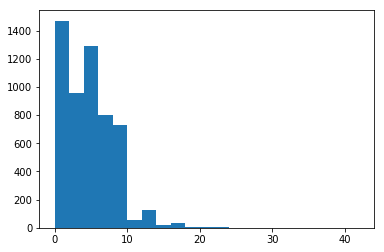

In [779]:
#historgram as basis for creating bins
plt.hist(test2['ratio'],range(0,44,2))

# creating bins
bin0=products with ratio 0  ;  bin0-4=products with ratio 0 - 4  ;  bin4-6=products with ratio 4 - 6 ;  bin6-8=products with ratio 6-8 ; bin10=products with ration >10

after creating the bins I computed with the function above the optimal baseline-date for every bin.

# bin 0 

In [780]:
test0_bin0=test0[test0['ratio']==0]

In [781]:
test1_bin0=test1[test1['ratio']==0]
test2_bin0=test2[test2['ratio']==0]
test3_bin0=test3[test3['ratio']==0]
test4_bin0=test4[test4['ratio']==0]

In [782]:
results_t0bin0=baseline(test0_bin0)
results_t1bin0=baseline(test1_bin0)
results_t2bin0=baseline(test2_bin0)
results_t3bin0=baseline(test3_bin0)
results_t4bin0=baseline(test4_bin0)

In [783]:
print(len(test0_bin0))
print(len(test1_bin0))
print(len(test2_bin0))
print(len(test3_bin0))
print(len(test4_bin0))


1470
1470
1470
1470
1470


In [784]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin0[i])
    print(results_t1bin0[i])
    print(results_t2bin0[i])
    print(results_t3bin0[i])
    print(results_t4bin0[i])
    i=i+1
    j=j+1

1
168.02975926900567
168.24684246665672
168.1814496310458
167.8153747426022
168.20523178545903
2
163.67040050051813
163.91156152022955
163.82612734237478
163.44418007380992
163.84443841644426
3
159.29218436571205
159.5713006777848
159.4459155952262
159.0723106011854
159.47100049852324
4
154.88705562441297
155.18698399028187
155.03870484495155
154.66091943344964
155.05805364443344
5
150.47923444781344
150.7812985751217
150.63532122314473
150.23315213360866
150.60876468519353
6
146.05478424207814
146.34548165215077
146.21559424356897
145.78751661236294
146.11981385151023
7
141.6474496770062
141.89785058273435
141.79915373513342
141.37185009753534
141.64391974243017
8
137.3608386695422
137.56816492197603
137.5027272456805
137.09121051329294
137.29166034395533
9
133.18408313308313
133.3604139165742
133.33041663476493
132.9135057095403
133.04510513355987
10
129.15107432770353
129.28650354928777
129.3019721427326
128.87978895078933
128.94572501638044
11
125.20383380711631
125.26372180324198


In [785]:
#best day=22

# bin0-4

In [786]:
test0_bin0_4=test0[(test0['ratio']>0) & (test0['ratio']<4)]
test1_bin0_4=test1[(test1['ratio']>0) & (test1['ratio']<4)]
test2_bin0_4=test2[(test2['ratio']>0) & (test2['ratio']<4)]
test3_bin0_4=test3[(test3['ratio']>0) & (test3['ratio']<4)]
test4_bin0_4=test4[(test4['ratio']>0) & (test4['ratio']<4)]

In [787]:
print(len(test1_bin0_4))
print(len(test2_bin0_4))
print(len(test3_bin0_4))
print(len(test4_bin0_4))
print(len(test5_bin0_4))

972
955
968
988
947


In [788]:
results_t0bin0_4=baseline(test0_bin0_4)
results_t1bin0_4=baseline(test1_bin0_4)
results_t2bin0_4=baseline(test2_bin0_4)
results_t3bin0_4=baseline(test3_bin0_4)
results_t4bin0_4=baseline(test4_bin0_4)

In [789]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin0_4[i])
    print(results_t1bin0_4[i])
    print(results_t2bin0_4[i])
    print(results_t3bin0_4[i])
    print(results_t4bin0_4[i])
    i=i+1
    j=j+1

1
112.73420066687837
114.38094246857735
112.76524287208359
113.78927893259541
114.09645042682091
2
108.71982339941506
110.28599185753374
108.73361945598978
109.6813566655701
109.92724866929036
3
105.20931517693668
106.6536450385077
105.17604289951205
106.02829810951414
106.23558725775464
4
102.09799214480175
103.38762014864255
102.00490184299969
102.74239631233058
103.02426898551623
5
99.25220400575496
100.46392387319938
99.16652661054536
99.80981915623332
100.18981984213765
6
96.69539802906858
97.81104232140663
96.62815324738438
97.21111047611791
97.64220398987315
7
94.34511116109833
95.38867857350787
94.29740187301027
94.80506315593065
95.33100230250388
8
92.29301165310405
93.34345183246653
92.26592003551474
92.76852914647294
93.29523031752481
9
90.50414355155237
91.52595260361949
90.50966799187809
91.02746838180221
91.47677300823418
10
89.12911982062877
90.160967164289
89.15716460273958
89.71064596802321
90.1443287178955
11
88.03976374343584
89.13472948295743
88.13625814612281
88.74

In [790]:
#best day=13

# bin4-6

In [791]:
test0_bin4_6=test0[(test0['ratio']>4) & (test0['ratio']<6)]
test1_bin4_6=test1[(test1['ratio']>4) & (test1['ratio']<6)]
test2_bin4_6=test2[(test2['ratio']>4) & (test2['ratio']<6)]
test3_bin4_6=test3[(test3['ratio']>4) & (test3['ratio']<6)]
test4_bin4_6=test4[(test4['ratio']>4) & (test4['ratio']<6)]

In [792]:
print(len(test0_bin4_6))
print(len(test1_bin4_6))
print(len(test2_bin4_6))
print(len(test3_bin4_6))
print(len(test4_bin4_6))

1283
1279
1287
1284
1248


In [793]:
results_t0bin4_6=baseline(test0_bin4_6)
results_t1bin4_6=baseline(test1_bin4_6)
results_t2bin4_6=baseline(test2_bin4_6)
results_t3bin4_6=baseline(test3_bin4_6)
results_t4bin4_6=baseline(test4_bin4_6)

In [794]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin4_6[i])
    print(results_t1bin4_6[i])
    print(results_t2bin4_6[i])
    print(results_t3bin4_6[i])
    print(results_t4bin4_6[i])
    i=i+1
    j=j+1

1
142.95453822806746
140.61649974309557
142.86357128393507
141.89432687743368
140.13921649559768
2
138.49548729110273
136.11024943037904
138.4088147481944
137.44089638822936
135.7534529947581
3
134.23114392718256
131.86735759845953
134.15662488300754
133.21411336641475
131.62446581088184
4
130.16527954873374
127.92966817747946
130.13454575937936
129.24395537122808
127.74584141959377
5
126.32497773599646
124.19742348374221
126.36455199145051
125.4830665866913
124.12493705939995
6
122.61729078722952
120.64824905484538
122.723265927859
121.83595528414426
120.6358155772986
7
119.00420160649792
117.23054209547954
119.19731540601072
118.34694757364889
117.28171212938528
8
115.78860047517631
114.20157617125956
116.02154972245458
115.2128465059344
114.28473213863697
9
112.85388783732708
111.48542505637228
113.11056537742175
112.29425630903836
111.55716023635597
10
110.24971655292362
109.05044704172468
110.4852931389513
109.71781988355401
109.12836478203089
11
108.00925886237717
106.99065379742

In [795]:
# best day 16

# bin6-8

In [796]:
test0_bin6_8=test0[(test0['ratio']>6) & (test0['ratio']<8)]
test1_bin6_8=test1[(test1['ratio']>6) & (test1['ratio']<8)]
test2_bin6_8=test2[(test2['ratio']>6) & (test2['ratio']<8)]
test3_bin6_8=test3[(test3['ratio']>6) & (test3['ratio']<8)]
test4_bin6_8=test4[(test4['ratio']>6) & (test4['ratio']<8)]

In [797]:
print(len(test0_bin6_8))
print(len(test1_bin6_8))
print(len(test2_bin6_8))
print(len(test3_bin6_8))
print(len(test4_bin6_8))

823
800
803
811
811


In [798]:
results_t0bin6_8=baseline(test0_bin6_8)
results_t1bin6_8=baseline(test1_bin6_8)
results_t2bin6_8=baseline(test2_bin6_8)
results_t3bin6_8=baseline(test3_bin6_8)
results_t4bin6_8=baseline(test4_bin6_8)

In [799]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin6_8[i])
    print(results_t1bin6_8[i])
    print(results_t2bin6_8[i])
    print(results_t3bin6_8[i])
    print(results_t4bin6_8[i])
    i=i+1
    j=j+1

1
119.05040949110591
117.64352935882194
117.14520903562382
118.04660096758398
119.63277142990545
2
115.6460116043783
114.3153532995459
113.79806676741042
114.69088891450794
116.33142309797469
3
112.35212503553282
111.12155506471281
110.56672193747991
111.42261888862602
113.11940593903418
4
109.27945827098522
108.11105401391663
107.55463727799001
108.40664186294121
110.07724560507498
5
106.29675441893792
105.21406750050109
104.66613587975817
105.48459603183775
107.12609392673663
6
103.30537256115966
102.3132444994293
101.7742600071354
102.54754994635415
104.16813332300815
7
100.39422294136251
99.46858800646564
98.93937537704592
99.66443698732262
101.28178513434683
8
97.57048734120374
96.73675619949223
96.1977130705299
96.87104830649868
98.4733466477097
9
94.8525170989152
94.0744386111339
93.5467797414748
94.18598621875762
95.77055915050303
10
92.23882046080165
91.62968951164245
91.10433579144299
91.73875952943771
93.24698386543128
11
89.78307190111062
89.39798655450804
88.84255736976509

In [800]:
#best day 18

# bin8-10

In [801]:
test0_bin8_10=test0[(test0['ratio']>8) & (test0['ratio']<10)]
test1_bin8_10=test1[(test1['ratio']>8) & (test1['ratio']<10)]
test2_bin8_10=test2[(test2['ratio']>8) & (test2['ratio']<10)]
test3_bin8_10=test3[(test3['ratio']>8) & (test3['ratio']<10)]
test4_bin8_10=test4[(test4['ratio']>8) & (test4['ratio']<10)]

In [802]:
print(len(test0_bin8_10))
print(len(test1_bin8_10))
print(len(test2_bin8_10))
print(len(test3_bin8_10))
print(len(test4_bin8_10))

725
729
729
718
736


In [803]:
results_t0bin8_10=baseline(test0_bin8_10)
results_t1bin8_10=baseline(test1_bin8_10)
results_t2bin8_10=baseline(test2_bin8_10)
results_t3bin8_10=baseline(test3_bin8_10)
results_t4bin8_10=baseline(test4_bin8_10)

In [804]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin8_10[i])
    print(results_t1bin8_10[i])
    print(results_t2bin8_10[i])
    print(results_t3bin8_10[i])
    print(results_t4bin8_10[i])
    i=i+1
    j=j+1

1
111.97767634667188
111.42261888862602
112.63658375501274
110.47171583713181
112.03570859328734
2
108.81176406988355
108.18502669038817
109.4440496326776
107.27534665523109
108.79338215167317
3
105.76861538282516
105.04760825454333
106.33437826027856
104.20172743289815
105.66929544574431
4
102.85912696499032
102.06860437960343
103.40212763768452
101.31140113531151
102.70345661174214
5
100.024996875781
99.21189444819608
100.55346836385108
98.50888284819801
99.81983770774224
6
97.25224933131366
96.42613753542138
97.76502442080194
95.7496736286866
97.01546268507923
7
94.50396817065408
93.68564457802486
95.0
93.00537618869137
94.23375191511798
8
91.85858696931932
90.9945053286186
92.32551110067033
90.34378783292186
91.52048950918041
9
89.44830909525345
88.5607136375944
89.81647955692763
87.90904390334364
89.03931715820826
10
87.23531395025755
86.3365507765975
87.54427451295716
85.70880934886448
86.77557259966655
11
85.19976525789258
84.31488599292535
85.492689745966
83.68990381163071
84.6

In [805]:
# best day 18

# bin10

In [806]:
test0_bin10=test0[(test0['ratio']>10)]
test1_bin10=test1[(test1['ratio']>10)]
test2_bin10=test2[(test2['ratio']>10)]
test3_bin10=test3[(test3['ratio']>10)]
test4_bin10=test4[(test4['ratio']>10)]

In [807]:
print(len(test0_bin10))
print(len(test1_bin10))
print(len(test2_bin10))
print(len(test3_bin10))
print(len(test4_bin10))

257
255
261
254
252


In [808]:
results_t0bin10=baseline(test0_bin10)
results_t1bin10=baseline(test1_bin10)
results_t2bin10=baseline(test2_bin10)
results_t3bin10=baseline(test3_bin10)
results_t4bin10=baseline(test4_bin10)

In [809]:
j=1
i=0
while i<len(results0):
    print(j)
    print(results_t0bin10[i])
    print(results_t1bin10[i])
    print(results_t2bin10[i])
    print(results_t3bin10[i])
    print(results_t4bin10[i])
    i=i+1
    j=j+1

1
74.91328320131217
74.81978348003956
75.03332592921628
73.90534486760751
74.19568720619817
2
73.1778655059028
73.09582751429797
73.27346040688948
72.16647421067486
72.47758274114831
3
71.442284397967
71.34423592694787
71.5122367151245
70.42726744663604
70.76015828133795
4
69.6921803361037
69.54854419756032
69.70652767137379
68.65857557508748
69.01449123191448
5
67.94115100585212
67.72001181334805
67.86751800382861
66.85805860178712
67.23838189605696
6
66.17401302626281
65.84071688552609
66.02272336097626
65.0384501660364
65.42935121182236
7
64.35837163881635
63.92182725798755
64.1248781675256
63.182275995725256
63.56886030125127
8
62.56996084384263
61.99193495931547
62.21736092120912
61.335144900782616
61.68468205316454
9
60.778285596090974
60.03332407921454
60.315835400000886
59.464274989274024
59.75784467331465
10
58.966091951222275
58.0430874437258
58.36951259004995
57.56735185849702
57.766772456144714
11
57.148928248918196
56.01785429664367
56.40921910468182
55.65968020030299
55.8

In [810]:
#best day 24

# creating the ruleset

In [811]:
def predictor(test):
    predictions=[]
    i=0
    while i<len(test):
        if test['ratio'][i]==0:
            predictions.append(22)
        elif (test['ratio'][i]>0) & (test['ratio'][i]<4):
            predictions.append(13)
        elif (test['ratio'][i]>4) & (test['ratio'][i]<6):
            predictions.append(16)
        elif (test['ratio'][i]>6) & (test['ratio'][i]<8):
            predictions.append(18)
        elif (test['ratio'][i]>8) & (test['ratio'][i]<10):
            predictions.append(18)
        elif test['ratio'][i]>10:
            predictions.append(24)
        i=i+1
    return predictions

# Make predictions

In [812]:
predictions_test0=predictor(test0)

In [813]:
predictions_test1=predictor(test1)
predictions_test2=predictor(test2)
predictions_test3=predictor(test3)
predictions_test4=predictor(test4)

# Results

In [814]:
result_test0=np.sqrt(abs_sales_diff(predictions_test0,targets))
result_test1=np.sqrt(abs_sales_diff(predictions_test1,targets))
result_test2=np.sqrt(abs_sales_diff(predictions_test2,targets))
result_test3=np.sqrt(abs_sales_diff(predictions_test3,targets))
result_test4=np.sqrt(abs_sales_diff(predictions_test4,targets))

In [815]:
print(result_test0)
print(result_test1)
print(result_test2)
print(result_test3)
print(result_test4)

206.62768449556802
209.51849560361015
209.46837470128995
209.06936647916643
209.3895890439637


In [816]:
np.mean([result_test0,result_test1,result_test2,result_test3,result_test4])

208.81470206471963

In [817]:
np.std([result_test0,result_test1,result_test2,result_test3,result_test4])

1.1046273681067793